# Corona Virus Case Study

In [24]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_corona_patient = pd.read_csv("/Users/manishparihar/Desktop/SelfStudy/KaggleCompetition/CoronaVirus_Study/coronavirusdataset/patient.csv")
df_corona_patient

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


In [26]:
df_corona_route = pd.read_csv("/Users/manishparihar/Desktop/SelfStudy/KaggleCompetition/CoronaVirus_Study/coronavirusdataset/route.csv")
df_corona_route

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680
...,...,...,...,...,...,...,...
63,14,2020-01-30,Gyeonggi-do,Bucheon-si,market,37.484044,126.782436
64,14,2020-02-02,Gyeonggi-do,Seongnam-si,hospital_isolated,37.347722,127.124322
65,15,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680
66,15,2020-02-01,Gyeonggi-do,Suwon-si,hospital,37.304558,127.010198


In [27]:
df_corona_time = pd.read_csv("/Users/manishparihar/Desktop/SelfStudy/KaggleCompetition/CoronaVirus_Study/coronavirusdataset/time.csv")
df_corona_time

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0
5,2020-01-25,27,25,2,0,0,0,0,0,0,0
6,2020-01-26,51,47,3,0,0,24,22,1,0,0
7,2020-01-27,61,56,4,0,0,10,9,1,0,0
8,2020-01-28,116,97,4,0,0,55,41,0,0,0
9,2020-01-29,187,155,4,0,0,71,58,0,0,0


# 1. Data Visualization

In [28]:
print(df_corona_patient.dtypes)

id                    int64
sex                  object
birth_year          float64
country              object
region               object
group                object
infection_reason     object
infection_order     float64
infected_by         float64
contact_number      float64
confirmed_date       object
released_date        object
deceased_date        object
state                object
dtype: object


In [32]:
df_corona_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 14 columns):
id                  5328 non-null int64
sex                 383 non-null object
birth_year          370 non-null float64
country             5328 non-null object
region              371 non-null object
group               81 non-null object
infection_reason    140 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      47 non-null float64
confirmed_date      5328 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5328 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 582.9+ KB


In [33]:
df_corona_patient.isnull().sum()

id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [35]:
df_corona_patient.head(10)

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
5,6,male,1964.0,Korea,capital area,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaN,released
6,7,male,1991.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,9.0,2020-01-30,2020-02-15,NaN,released
7,8,female,1957.0,Korea,Jeollabuk-do,NaN,visit to Wuhan,1.0,NaN,113.0,2020-01-31,2020-02-12,NaN,released
8,9,female,1992.0,Korea,capital area,NaN,contact with patient,2.0,5.0,2.0,2020-01-31,2020-02-24,NaN,released
9,10,female,1966.0,Korea,capital area,NaN,contact with patient,3.0,6.0,43.0,2020-01-31,2020-02-19,NaN,released


Text(0.5, 1.0, 'Regions affected Overall')

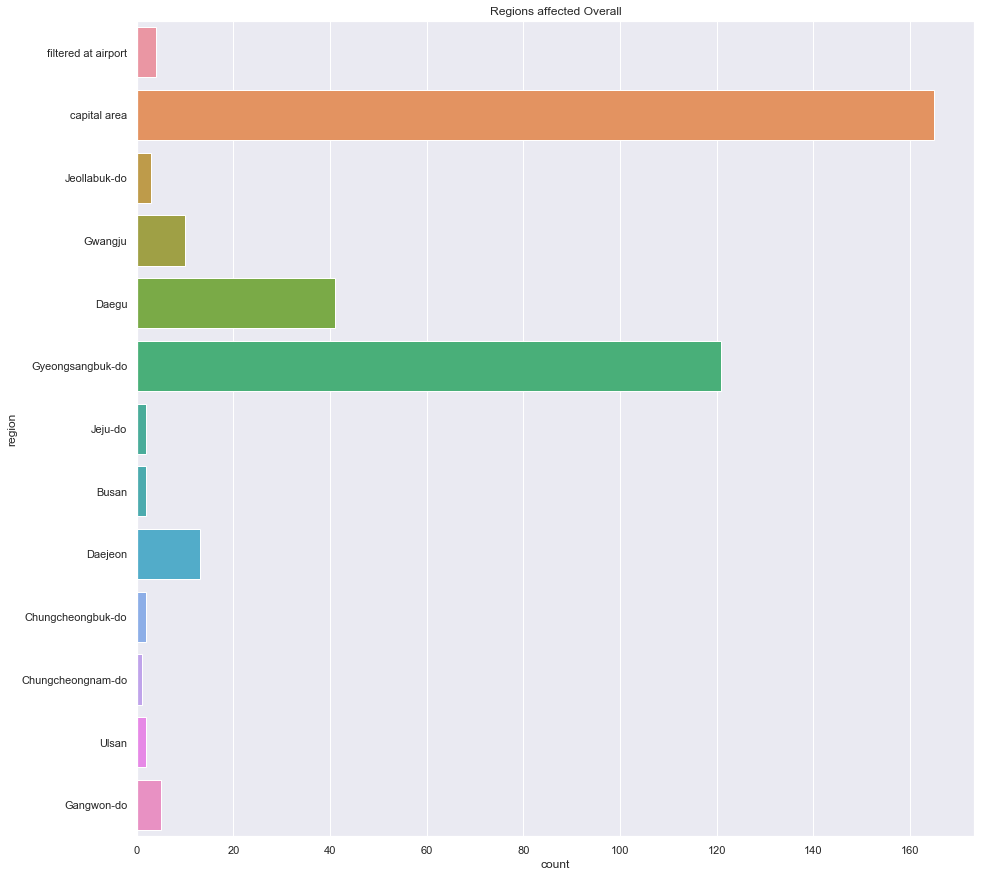

In [36]:
sns.set(rc={'figure.figsize':(15,15)})
sns.countplot(
    y=df_corona_patient['region'],
).set_title('Regions affected Overall')

In [38]:
reason = [x for x in df_corona_patient['infection_reason'].unique()]
size = [len((df_corona_patient['infection_reason'].loc[df_corona_patient['infection_reason']==reason])) for reason in reason]

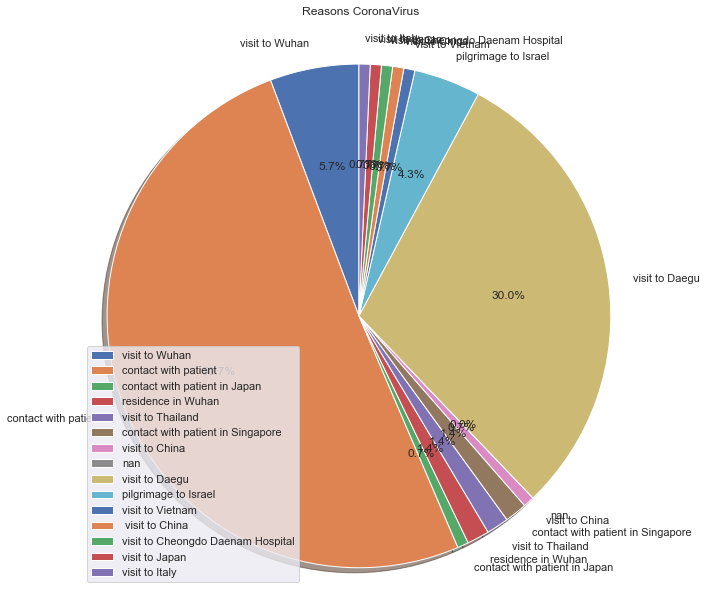

In [39]:
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(size,labels=reason,autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend()
ax1.set_title('Reasons CoronaVirus\n\n')
plt.show()

In [41]:
df_corona_patient['country'].unique()

array(['China', 'Korea', 'Mongolia'], dtype=object)

In [42]:
df_corona_patient['infection_reason'].unique()

array(['visit to Wuhan', 'contact with patient',
       'contact with patient in Japan', 'residence in Wuhan',
       'visit to Thailand', 'contact with patient in Singapore',
       'visit to China', nan, 'visit to Daegu', 'pilgrimage to Israel',
       'visit to Vietnam', ' visit to China',
       'visit to Cheongdo Daenam Hospital', 'visit to Japan',
       'visit to Italy'], dtype=object)

In [44]:
df_corona_patient['age'] = 2020-df_corona_patient['birth_year']
df_corona_patient['age']

0       36.0
1       56.0
2       54.0
3       56.0
4       33.0
        ... 
5323     NaN
5324     NaN
5325     NaN
5326     NaN
5327     NaN
Name: age, Length: 5328, dtype: float64

Text(0.5, 1.0, 'Affected population , By gender')

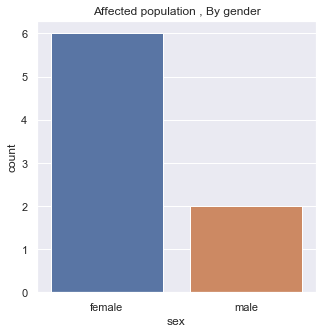

In [45]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['sex'].loc[(df_corona_patient['country']=="China")]).set_title('Affected population , By gender')

Text(0.5, 1.0, 'Female state in china')

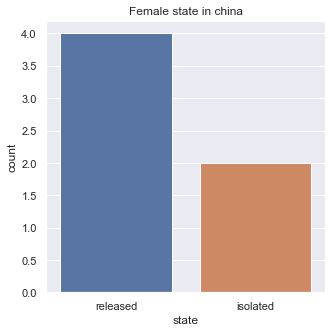

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['state'].loc[(df_corona_patient['country']=="China") &
                                    (df_corona_patient['sex']=="female")]).set_title('Female state in china')

Text(0.5, 1.0, 'Male state in china')

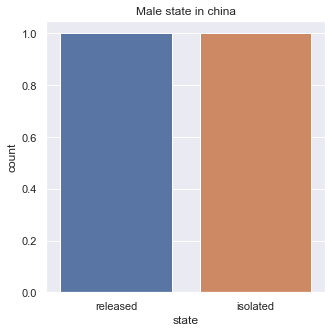

In [48]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['state'].loc[(df_corona_patient['country']=="China") &
                                    (df_corona_patient['sex']=="male")]).set_title('Male state in china')

Text(0.5, 1.0, 'Distribution plot for year, Females in China')

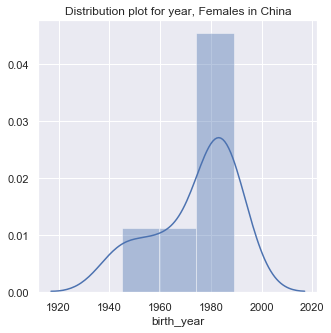

In [49]:
sns.distplot(df_corona_patient['birth_year'].loc[
    (df_corona_patient['country']=="China") & 
    (df_corona_patient['sex']=="female")]).set_title("Distribution plot for year, Females in China")

Text(0.5, 1.0, 'Distribution plot for year, Males in China')

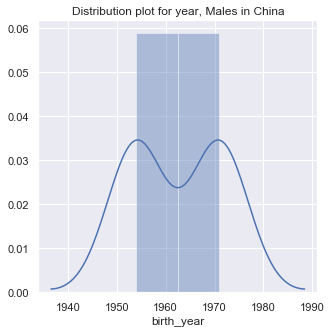

In [51]:
sns.distplot(df_corona_patient['birth_year'].loc[
    (df_corona_patient['country']=="China") & 
    (df_corona_patient['sex']=="male")]).set_title("Distribution plot for year, Males in China")

Let study the virus in korea 

Text(0.5, 1.0, 'Infected Population in Korea, By gender')

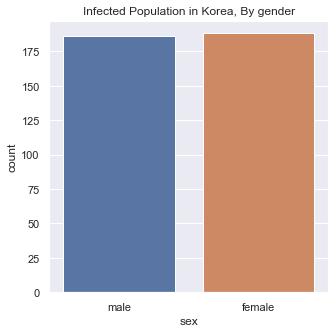

In [53]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['sex'].loc[(df_corona_patient['country']=="Korea")]).set_title("Infected Population in Korea, By gender")

Text(0.5, 1.0, 'Infected Population in Korea, By gender')

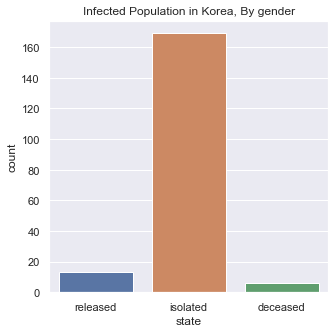

In [55]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['state'].loc[(df_corona_patient['country']=="Korea") &
                                             (df_corona_patient['sex']=="female")]).set_title("States of female in Korea, ")

Text(0.5, 1.0, 'States of Male in Korea, ')

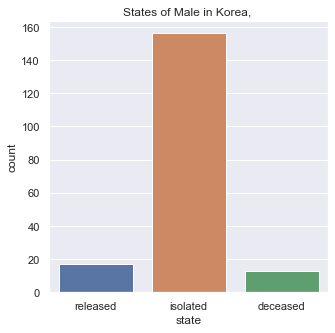

In [56]:
sns.set(rc={'figure.figsize':(5,5)})
sns.countplot(x=df_corona_patient['state'].loc[(df_corona_patient['country']=="Korea") &
                                             (df_corona_patient['sex']=="male")]).set_title("States of Male in Korea, ")

Distribution of female age wise in korea